# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [3]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
    f_x = []
    for i in range(len(x1)):
        for j in range(len(x2)):
            f_x.append(f(np.asarray([[x1[i], x2[j]]])))

    return np.asarray(f_x).reshape(len(x1), len(x2))

In [4]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

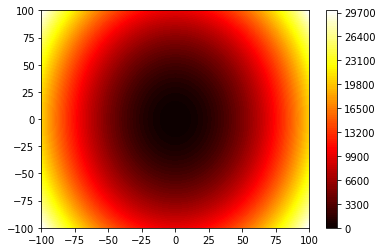

In [5]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$?

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2x_1 + 0.9\pi\sin(3\pi x_1)? \\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_2 + 1.6\pi\sin(4\pi x_2)? \\
\end{align*}

In [6]:
#=========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
#=========
# Implement the gradient for the considered f(x).
def grad(x):
    return np.array([x[:,0]*2+0.9*np.pi*np.sin(3*np.pi*x[:,0]), x[:,1]*4+1.6*np.pi*np.sin(4*np.pi*x[:,1])]).reshape(1, 2)

In [7]:
#=========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
#=========
# Implement the gradient descent (GD) optimization algorithm. 
# It is equivalent to implementing the step function.
class GradientDescent(object):
    def __init__(self, grad, step_size=0.1):
        self.grad = grad
        self.step_size = step_size    

    def step(self, x_old):
        return x_old - self.grad(x_old)*self.step_size

In [8]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap='hot')

    # Init the solution
    x = np.asarray([[90., -90.]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
    ax.set_title(title)

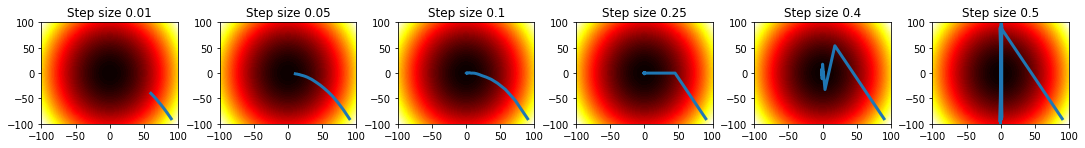

In [9]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
  # take the step size
  step_size = step_sizes[i]
  # init the GD
  gd = GradientDescent(grad, step_size=step_size)
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**: <em>For step size 0.01, There aren't enough epochs to reach the minimum but it is very precisely inching towards it. Step sizes 0.05 and 0.1 work very well here and reach or almost reach the minimum smoothly. Step sizes 0.25 and 0.4 have more hectic movements but because the landscape is convex they still find the minimum. With step size 0.5, the gradient is too great and the minimum is never found, the value of **x** never reaches the minimum.</em>


**Question 3 (0-0.5pt)**: Can we do something about the step size equal 0.01? What about the step size equal 0.5?

**Answer**: <em>For step size 0.01 we can increase the number of epochs. For step size 0.5 the easiest method for improvement would be to simply make the step size smaller. If, for some reason, the step size must remain constant, the gradient should return a lesser number. This can be achieved by multiplying f(**x**) by a scalar.</em>

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): The more complex the method, the higher the score! Please keep it in mind during developing your algorithm. TAs will also check whether the pseudocode is correct.*

**Answer:** PLEASE FILL IN

*Input:* PLEASE FILL IN

1. PLEASE FILL IN
2. ...

In [10]:
# Create points within the step size of x. The number of points created is equivalent to exploration number
def obj_fun(x, step_size, exploration_num):
    # Get an array of new values for x within the step size around x
    y = (np.random.rand(exploration_num, 1, 2)*2-1)*step_size + x
    # Add x to y in case none of the new values are better
    y = np.append(y, x).reshape(-1, 1, 2)
    # Find the value of f(x) for every new x
    f_x = [[f(y_i).item(0), i] for i, y_i in enumerate(y)]
    # Return the one with the smallest value for f(x)
    return y[min(f_x)[1]]

In [11]:
#=========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
#=========
# Implement a derivative-free optimization (DFO) algorithm. 
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
class DFO(object):
    def __init__(self, obj_fun, step_size=1, exploration_num=16):
        self.obj_fun = obj_fun
        self.step_size = step_size
        self.exploration_num = exploration_num

    def step(self, x_old):
        return self.obj_fun(x_old, self.step_size, self.exploration_num)

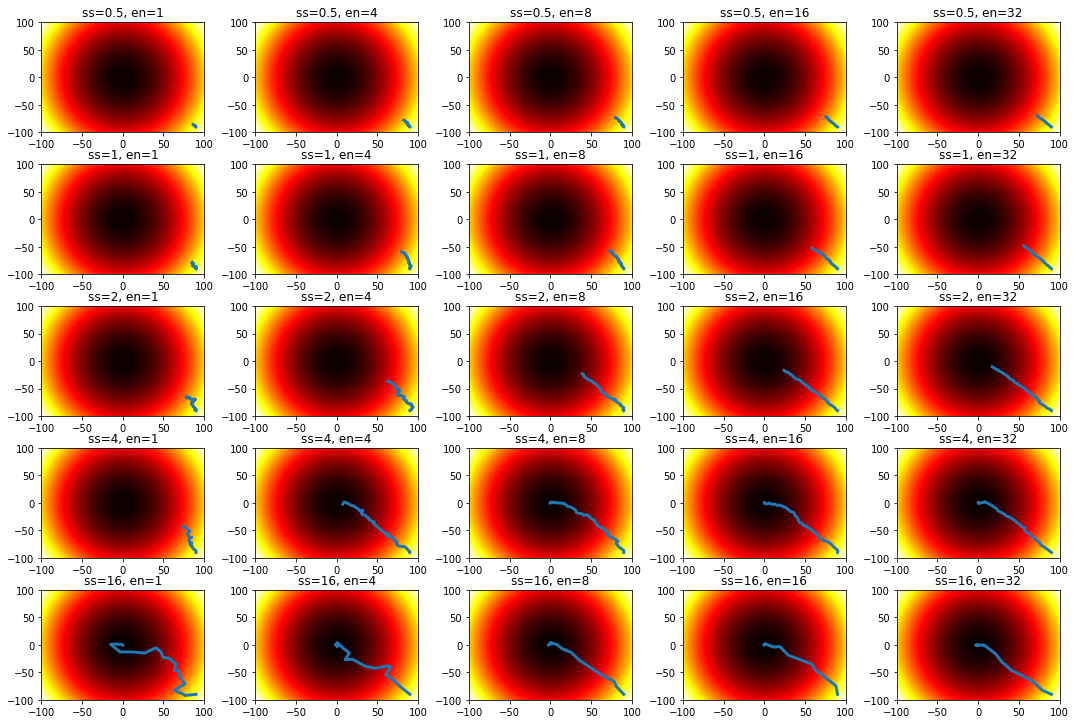

In [12]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 50 # the number of epochs
step_sizes = [0.5, 1, 2, 4, 16]
exploration_nums = [1, 4, 8, 16, 32]

## plotting the convergence of the DFO
fig_dfo, axs = plt.subplots(len(step_sizes), len(exploration_nums), figsize=(15, 10))
fig_dfo.tight_layout()

for i, step_size in enumerate(step_sizes):
    for j, exploration_num in enumerate(exploration_nums):
        dfo = DFO(obj_fun, step_size=step_size, exploration_num=exploration_num)
        ## The acronym ss stands for step size and en for exploration number
        plot_optimization_process(axs[i][j], optimizer=dfo, title='ss={}, en={}'.format(step_size, exploration_num))

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** <em>This algorithm generates a set number of points around current **x** and selects the one with the lowest value of f(**x**) to be the new **x**. If none of the new points are lower, the original **x** is returned. It works in a lot of ways like random search which is not unsurprising as it uses random points to find the new value of **x**.<br/>
As can be seen it works quite well and finds the minimum given enough time. There are two hyperparameters for controlling the learning rate which might prove more versatile than a single one.<br/>
A potential weakness is that unlike gradient descent, it doesn't know which direction to actually go for systematic improvement. This could be improved upon by adding some memory component and making the algorithm generate new points based on probabilities. That way if the new point has a better value, the next step, more points are generated further in that direction.<br/><br/>
No real issues arose during development but I was surprised that I couldn't find a numpy function for generating random numbers around a certain point.</em>

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: <em>Gradient descent very purposefully rolls the value of the function down to get to the (locally) lowest point. DFOs merely approximate what gradient descent is built for. They are useful when the function is non-differentiable and under some circumstances are probably faster but there is a reason why gradient descent is the most popular optimization technique in machine learning.</em>

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: <em>The easier one to apply is definitely gradient descent. It does everything for you and it does it well. It may be harder to implement gradient descent if the function is very complicated but even then, the differentiation is probably done by the program as well so implementing it is still very easy. DFO algorithms are only really useful when the function is non-differentiable, unknown, or otherwise unreliable.<em/>